Install dependencies

In [1]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html\

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-0ajsf9xa
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-0ajsf9xa
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.1 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=edd256a168f1117d71b76b1d436dc6d1738d43fe20e9c982d5e0c0a4633fc9da
  Stored in directory: /tmp/pip-ephem-wheel-cache-y8lqzvnk/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


Looking in links: https://download.pytorch.org/whl/torch_stable.html\
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cu101 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1)
ERROR: No matching distribution found for torch==1.7.1+cu101


Load the CLIP model

In [2]:
import clip
import torch
from PIL import Image
from IPython.display import display

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 74.0MiB/s]


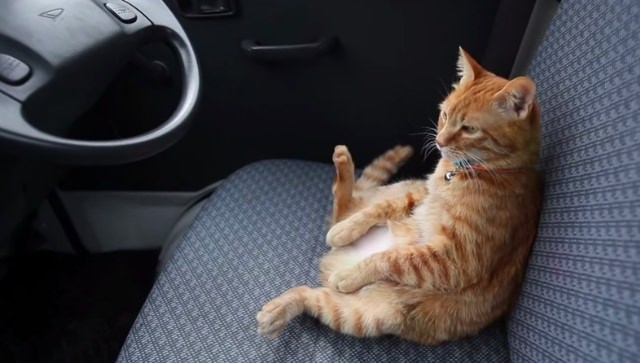

a cat
Label probs: [[0.9861129  0.01388714]]


In [21]:
labels = ["a cat", "a dog"]

raw_image = Image.open("training_data/1.jpg")
display(raw_image)

image = preprocess(Image.open("training_data/1.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(labels).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(labels[probs.argmax()])
print("Label probs:", probs)